<a href="https://colab.research.google.com/github/josephananda/TMDB-5000-Analysis-And-Prediction/blob/main/tmdb_5000_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Install kaggle
!pip install -q kaggle
#Mengupload kaggle.json api keys
from google.colab import files
files.upload()
#Membuat direktori kaggle
! mkdir ~/.kaggle
#Membuat duplikat file kaggle.json kedalam direktori kaggle
! cp kaggle.json ~/.kaggle/
#mengubah hak askses file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

tmdb-movie-metadata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!mkdir movies
!unzip -qq /content/tmdb-movie-metadata.zip -d movies

mkdir: cannot create directory ‘movies’: File exists
replace movies/tmdb_5000_credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace movies/tmdb_5000_movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Importing Libraries and Dataset

In [16]:
#importing libraries
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#load the datasets
movies_df = pd.read_csv("movies/tmdb_5000_movies.csv")
credits_df = pd.read_csv("movies/tmdb_5000_credits.csv")

In [18]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [19]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies_df.rename(columns={'id':'movie_id'}, inplace=True)

In [21]:
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
df = pd.merge(movies_df, credits_df, on='movie_id')
df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
df_copy = df.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [25]:
movies_df.shape, credits_df.shape

((4803, 20), (4803, 4))

In [26]:
df.shape

(4803, 23)

### Handling JSON Columns

In [27]:
json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew']
df[json_columns].head()

,genres,keywords,production_companies,production_countries,spoken_languages,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [28]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [29]:
#Return a list of XX from XX column
def convert(data):
    genres_list = []
    for i in ast.literal_eval(data):
        genres_list.append(i['name'])
    return genres_list

In [30]:
df['genres'] = df['genres'].apply(convert)

In [31]:
df['genres'][0:5]

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [32]:
df['keywords'] = df['keywords'].apply(convert)
df['production_companies'] = df['production_companies'].apply(convert)
df['production_countries'] = df['production_countries'].apply(convert)

#### Select first 4 cast from cast columns

In [33]:
def fetch_casts(data):
    count = 0
    casts_list = []
    for i in ast.literal_eval(data):
        if(count<4):
            casts_list.append(i['name'])
        count = count + 1
        if count>3:
            break
            
    return casts_list

In [34]:
df['cast'] = df['cast'].apply(fetch_casts)

In [35]:
df['cast'][0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang']

#### Extracting director name from crew columns

In [36]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [37]:
def fetch_director(data):
    for i in ast.literal_eval(data):
        if i['job']=='Director':
            return i['name']

In [38]:
df['director'] = df['crew'].apply(fetch_director)
df['director'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [39]:
df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton


In [40]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
movie_id                   0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
director                  30
dtype: int64

In [41]:
df.drop(['homepage', 'tagline'], axis=1, inplace=True)

In [42]:
df.shape

(4803, 22)

In [43]:
df.dropna(inplace=True)

In [44]:
df

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],"[Mexico, United States of America]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez
4799,9000,"[Comedy, Romance]",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],...,85.0,[],Released,Newlyweds,5.9,5,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns
4800,0,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6,"Signed, Sealed, D

In [45]:
print('There are {} rows with 0 budget'.format(len(df[df['budget']==0])))
print('There are {} rows with 0 revenue'.format(len(df[df['revenue']==0])))

There are 1014 rows with 0 budget
There are 1396 rows with 0 revenue


In [46]:
#Insight 1: Top 10 Popular Movies based on Budget
budget_df = df[(df['budget']!=0)]
budget_df.shape

(3756, 22)

In [47]:
top_10_budget_df = budget_df.sort_values(ascending = False, by = 'budget')[['title_x', 'director', 'budget']][0:10]
top_10_budget_df.reset_index(drop = True, inplace = True)

In [48]:
top_10_budget_df

,title_x,director,budget
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,380000000
1,Pirates of the Caribbean: At World's End,Gore Verbinski,300000000
2,Avengers: Age of Ultron,Joss Whedon,280000000
3,Superman Returns,Bryan Singer,270000000
4,John Carter,Andrew Stanton,260000000
5,Tangled,Byron Howard,260000000
6,Spider-Man 3,Sam Raimi,258000000
7,The Lone Ranger,Gore Verbinski,255000000
8,X-Men: Days of Future Past,Bryan Singer,250000000
9,The Hobbit: The Desolation of Smaug,Peter Jackson,250000000


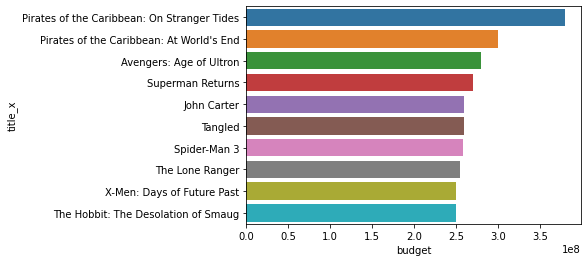

In [49]:
sns.barplot(x = 'budget', y = 'title_x', data = top_10_budget_df)
plt.show()

In [50]:
#Insight 2: Top 10 Popular Movies based on Revenue
revenue_df = df[(df['revenue']!=0)]
revenue_df.shape

(3374, 22)

In [51]:
top_10_revenue_df = revenue_df.sort_values(ascending = False, by = 'revenue')[['title_x', 'director', 'revenue']][0:10]
top_10_revenue_df.reset_index(drop = True, inplace = True)

In [52]:
top_10_revenue_df

,title_x,director,revenue
0,Avatar,James Cameron,2787965087
1,Titanic,James Cameron,1845034188
2,The Avengers,Joss Whedon,1519557910
3,Jurassic World,Colin Trevorrow,1513528810
4,Furious 7,James Wan,1506249360
5,Avengers: Age of Ultron,Joss Whedon,1405403694
6,Frozen,Chris Buck,1274219009
7,Iron Man 3,Shane Black,1215439994
8,Minions,Kyle Balda,1156730962
9,Captain America: Civil War,Anthony Russo,1153304495


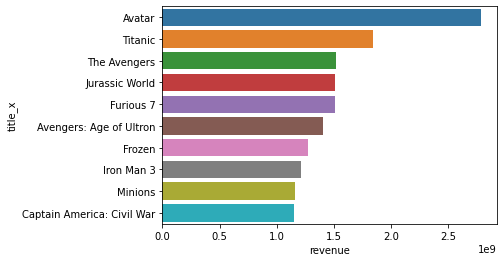

In [53]:
sns.barplot(x = 'revenue', y = 'title_x', data = top_10_revenue_df)
plt.show()

In [54]:
#Insight 3: Top 10 Popular Movies based on Rating
rating_df = df[(df['vote_average']!=0)]
rating_df.shape

(4721, 22)

In [55]:
top_10_rating_df = rating_df.sort_values(ascending = False, by = 'vote_average')[['title_x', 'director', 'vote_average']][0:10]
top_10_rating_df.reset_index(drop = True, inplace = True)

In [56]:
top_10_rating_df

,title_x,director,vote_average
0,Stiff Upper Lips,Gary Sinyor,10.0
1,"Dancer, Texas Pop. 81",Tim McCanlies,10.0
2,Sardaarji,Rohit Jugraj,9.5
3,One Man's Hero,Lance Hool,9.3
4,There Goes My Baby,Floyd Mutrux,8.5
5,The Shawshank Redemption,Frank Darabont,8.5
6,The Godfather,Francis Ford Coppola,8.4
7,The Prisoner of Zenda,John Cromwell,8.4
8,Schindler's List,Steven Spielberg,8.3
9,Whiplash,Damien Chazelle,8.3


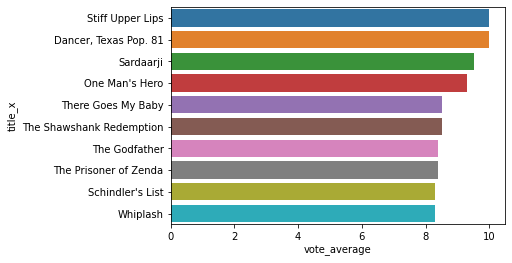

In [59]:
ax = sns.barplot(x = 'vote_average', y = 'title_x', data = top_10_rating_df)
plt.show()

In [60]:
#Insight 4: Top 10 Popular Movies based on Popularity
popularity_df = df[(df['popularity']!=0)]
popularity_df.shape

(4770, 22)

In [61]:
top_10_popular_df = rating_df.sort_values(ascending = False, by = 'popularity')[['title_x', 'director', 'popularity']][0:10]
top_10_popular_df.reset_index(drop = True, inplace = True)

In [62]:
top_10_popular_df

,title_x,director,popularity
0,Minions,Kyle Balda,875.581305
1,Interstellar,Christopher Nolan,724.247784
2,Deadpool,Tim Miller,514.569956
3,Guardians of the Galaxy,James Gunn,481.098624
4,Mad Max: Fury Road,George Miller,434.278564
5,Jurassic World,Colin Trevorrow,418.708552
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,271.972889
7,Dawn of the Planet of the Apes,Matt Reeves,243.791743
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,206.227151
9,Big Hero 6,Chris Williams,203.734590


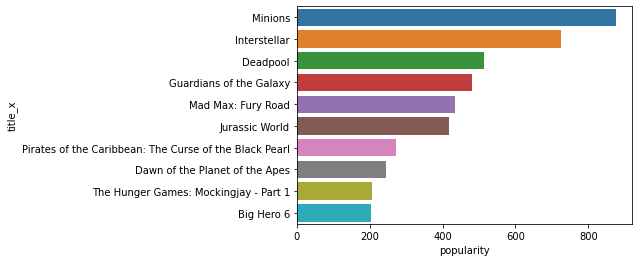

In [66]:
ax = sns.barplot(x = 'popularity', y = 'title_x', data = top_10_popular_df)
plt.show()

In [67]:
#Insight 4: Top 10 Longest Movies
runtime_df = df[(df['runtime']!=0)]
runtime_df.shape

(4747, 22)

In [68]:
top_10_longest_df = runtime_df.sort_values(ascending = False, by = 'runtime')[['title_x', 'director', 'runtime']][0:10]
top_10_longest_df.reset_index(drop = True, inplace = True)

In [69]:
top_10_longest_df

,title_x,director,runtime
0,Carlos,Olivier Assayas,338.0
1,The Company,Mikael Salomon,276.0
2,Gettysburg,Ronald F. Maxwell,254.0
3,Cleopatra,Joseph L. Mankiewicz,248.0
4,Hamlet,Kenneth Branagh,242.0
5,Emma,Jim O'Hanlon,240.0
6,Gone with the Wind,Victor Fleming,238.0
7,Once Upon a Time in America,Sergio Leone,229.0
8,Woodstock,Michael Wadleigh,225.0
9,Heaven's Gate,Michael Cimino,219.0


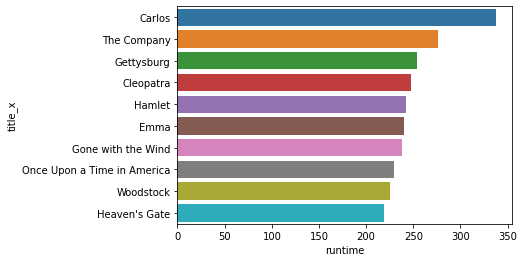

In [71]:
ax = sns.barplot(x = 'runtime', y = 'title_x', data = top_10_longest_df)
plt.show()

## Feature Engineering

In [72]:
#converting object dtype to datetime so that we can extract some datetime features.
df['release_date'] = pd.to_datetime(df['release_date'])

In [73]:
j = ['year' , 'month' , 'day', 'weekday']
def extracting_date_features(df_date):
    for i in j:
        df[i] = getattr(df_date['release_date'].dt , i).astype('int')
    return df_date

In [74]:
df = extracting_date_features(df)
df.head()

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,title_y,cast,crew,director,year,month,day,weekday
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron,2009,12,10,3
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski,2007,5,19,5
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes,2015,10,26,0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan,2012,7,16,0
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton,2012,3,7,2


In [75]:
df['month'].unique()

array([12,  5, 10,  7,  3, 11,  4,  6,  2,  8,  9,  1])

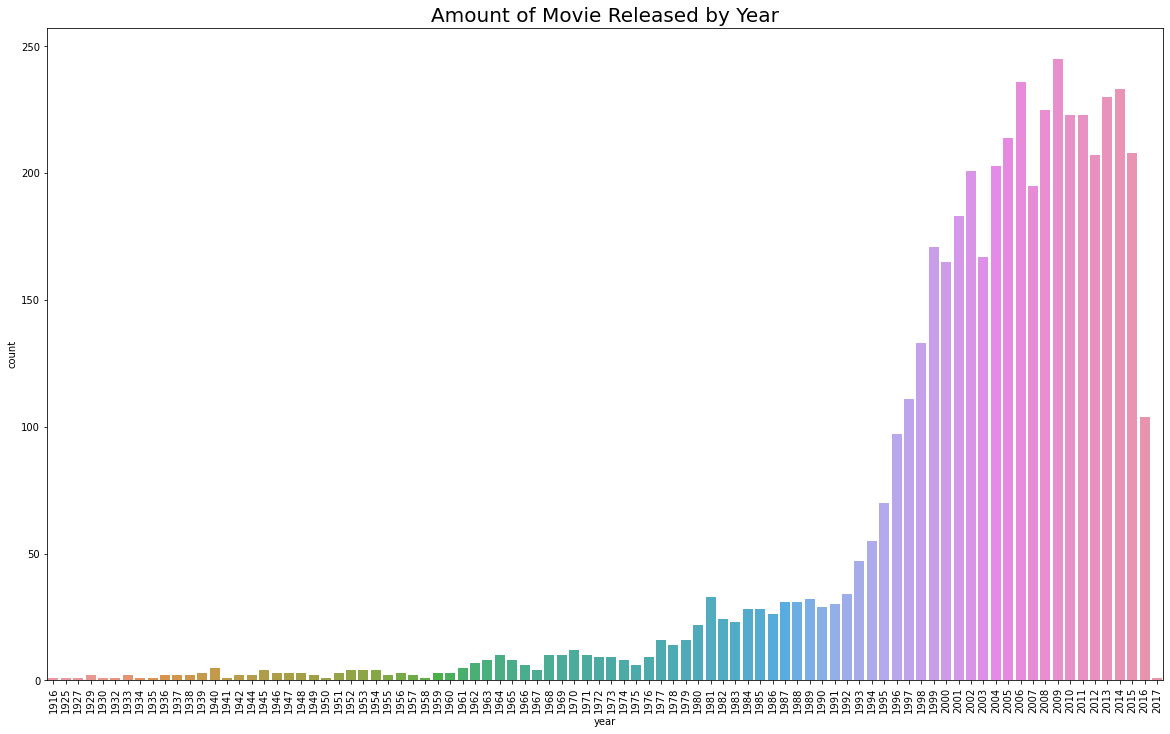

In [76]:
#Insight 6: Amount of Movies Released per Year
plt.figure(figsize = (20,12))
sns.countplot(x = 'year' , data = df)
plt.title("Amount of Movie Released by Year",fontsize=20)
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
def decade(x):
    if x>=1960 and x<=1969:
        return '60s'
    elif x>=1970 and x<=1979:
        return '70s'
    elif x>=1980 and x<=1989:
        return '80s'
    elif x>=1990 and x<=1999:
        return '90s'
    elif x>1999:
        return '21s'
    else:
        return 'between 1916 to 1960'

In [78]:
df['decade'] = df['year'].apply(decade)

In [79]:
df['decade'].value_counts()

21s                     3463
90s                      777
80s                      278
70s                      109
between 1916 to 1960      72
60s                       71
Name: decade, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


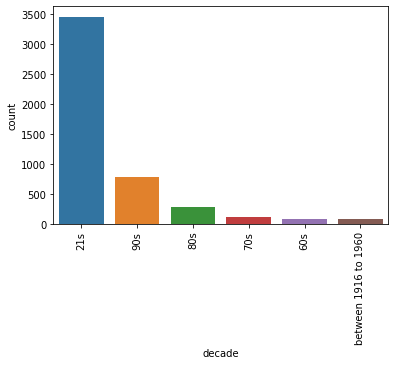

In [80]:
sns.countplot(df['decade'])
plt.xticks(rotation = 'vertical')
plt.show()

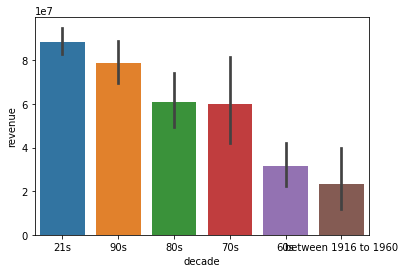

In [81]:
sns.barplot(x = 'decade' , y = 'revenue' , data = df )

Text(0.5, 1.0, 'revenue generated per month')

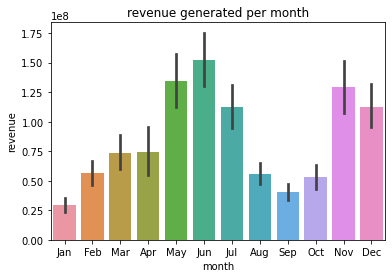

In [82]:
sns.barplot(x = 'month' , y = 'revenue' , data = df )
#lets replace number by actual month name
loc , labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.title('revenue generated per month')

Text(0.5, 1.0, 'revenue generated per week')

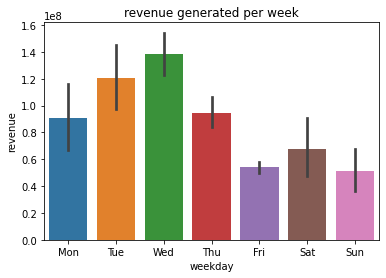

In [83]:
# plt.figure(figsize=(20,5));
sns.barplot(x = 'weekday' , y = 'revenue' , data = df)
loc , labels = plt.xticks()
loc , labels = loc ,['Mon' , 'Tue' , 'Wed' , 'Thu' , 'Fri' , 'Sat' , 'Sun']
plt.xticks(loc , labels,fontsize=10)
plt.title('revenue generated per week')

Text(0.5, 1.0, 'revenue generated per day')

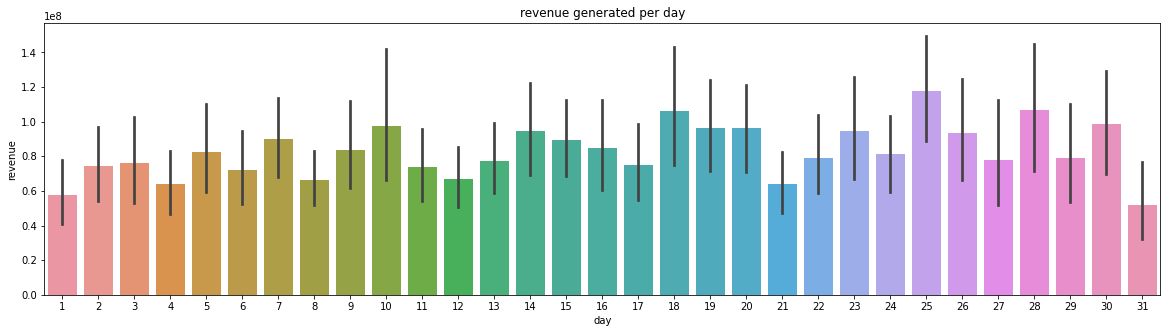

In [84]:
plt.figure(figsize=(20,5));
sns.barplot(x = 'day' , y = 'revenue' , data = df)
#loc , labels = plt.xticks()
#loc , labels = loc ,['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
#                    '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
#plt.xticks(loc , labels,fontsize=10)
plt.title('revenue generated per day')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


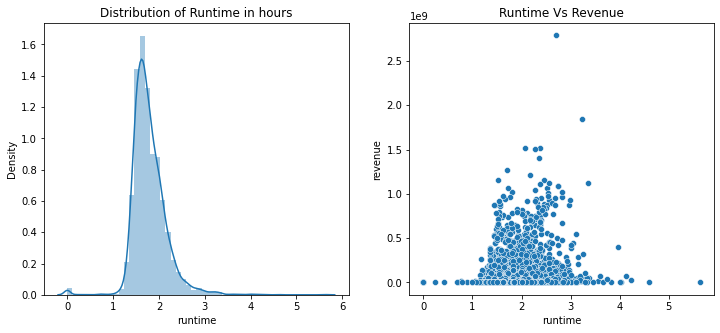

In [85]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Runtime in hours')
sns.distplot((df['runtime'] / 60 ) , kde = True )
plt.subplot(1,2,2)
plt.title('Runtime Vs Revenue')
sns.scatterplot(x = df['runtime']/60 , y = 'revenue' , data = df)

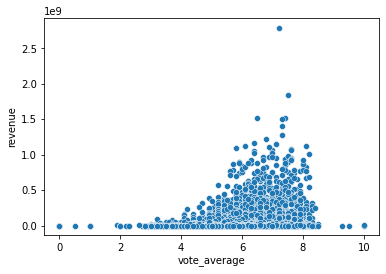

In [86]:
sns.scatterplot(x ='vote_average' , y = 'revenue', data = df)

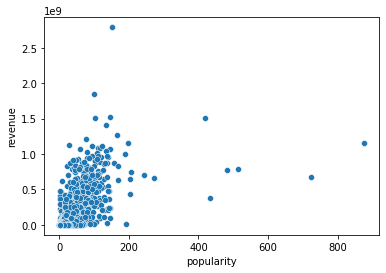

In [87]:
sns.scatterplot(x ='popularity' , y = 'revenue', data = df)

In [88]:
a = df['original_language'].value_counts()[0:8]
print(a)
ln_list = a.index.tolist()
print(ln_list)
#selecting index of top 8 languages

en    4474
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
Name: original_language, dtype: int64
['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it']


In [89]:
genres_df = df['genres'].apply(pd.Series)
genres_df.head()

,0,1,2,3,4,5,6
0,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN
1,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN
2,Action,Adventure,Crime,NaN,NaN,NaN,NaN
3,Action,Crime,Drama,Thriller,NaN,NaN,NaN
4,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN


In [90]:
stacked_genres = genres_df.stack()
stacked_genres.head(10)

0  0             Action
   1          Adventure
   2            Fantasy
   3    Science Fiction
1  0          Adventure
   1            Fantasy
   2             Action
2  0             Action
   1          Adventure
   2              Crime
dtype: object

In [91]:
raw_dummies = pd.get_dummies(stacked_genres)
raw_dummies.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0 0       1          0          0       0      0            0      0       0   
  1       0          1          0       0      0            0      0       0   
  2       0          0          0       0      0            0      0       0   
  3       0          0          0       0      0            0      0       0   
1 0       0          1          0       0      0            0      0       0   

     Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0 0        0        0        0       0      0        0        0   
  1        0        0        0       0      0        0        0   
  2        1        0        0       0      0        0        0   
  3        0        0        0       0      0        0        0   
1 0        0        0        0       0      0        0        0   

     Science Fiction  TV Movie  Thriller  War  Western  
0 0                0         0         0    0        0  
  1                0         0         0    0        0  
  2                0         0         0    0        0  
  3                1         0         0    0        0  
1 0                0         0         0    0        0

In [92]:
genre_dummies = raw_dummies.sum(level=0)
genre_dummies.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [93]:
unique_genres = genre_dummies.columns.tolist()
print('Number of unique genres: {} \nGenres: {}'.format(len(unique_genres) ,unique_genres ))

Number of unique genres: 20 
Genres: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


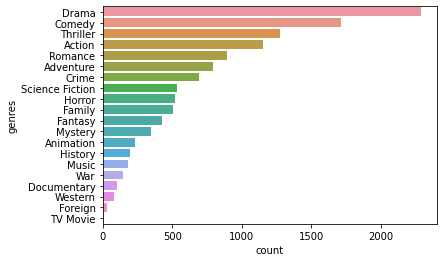

In [95]:
popular_genres = genre_dummies.sum().sort_values(ascending = False).reset_index()
popular_genres.columns = ['genres' , 'count']

ax = sns.barplot(x = 'count', y='genres', data = popular_genres)
plt.show()

In [96]:
production_company_df = df['production_companies'].apply(pd.Series)
production_company_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Columbia Pictures,Danjaq,B24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Legendary Pictures,Warner Bros.,DC Entertainment,Syncopy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Walt Disney Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
stacked_prod_company_df = production_company_df.stack()
raw_dummies_prod_company_df = pd.get_dummies(stacked_prod_company_df)
prod_company_dummies = raw_dummies_prod_company_df.sum(level=0)
unique_production_company = prod_company_dummies.columns.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  This is separate from the ipykernel package so we can avoid doing imports until


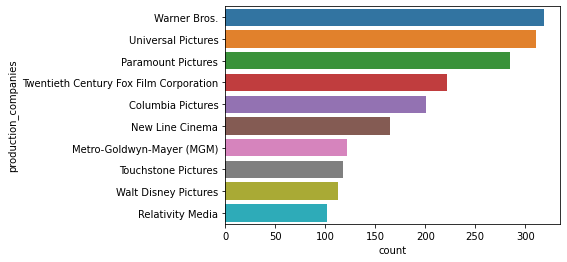

In [98]:
prod_company_df = prod_company_dummies.sum().sort_values(ascending = False).reset_index()
prod_company_df.columns = ['production_companies' , 'count']

ax = sns.barplot(x = 'count', y='production_companies', data = prod_company_df[0:10])
plt.show()

In [99]:
production_countries_df = df['production_countries'].apply(pd.Series)
production_countries_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States of America,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
stacked_prod_countries_df = production_countries_df.stack()
raw_dummies_prod_countries_df = pd.get_dummies(stacked_prod_countries_df)
prod_countries_dummies = raw_dummies_prod_countries_df.sum(level=0)
unique_production_countries = prod_countries_dummies.columns.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  This is separate from the ipykernel package so we can avoid doing imports until


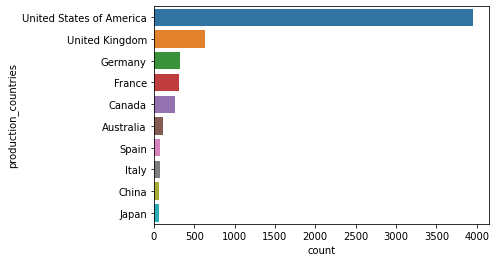

In [101]:
prod_countries_df = prod_countries_dummies.sum().sort_values(ascending = False).reset_index()
prod_countries_df.columns = ['production_countries' , 'count']

ax = sns.barplot(x = 'count', y='production_countries', data = prod_countries_df[0:10])
plt.show()

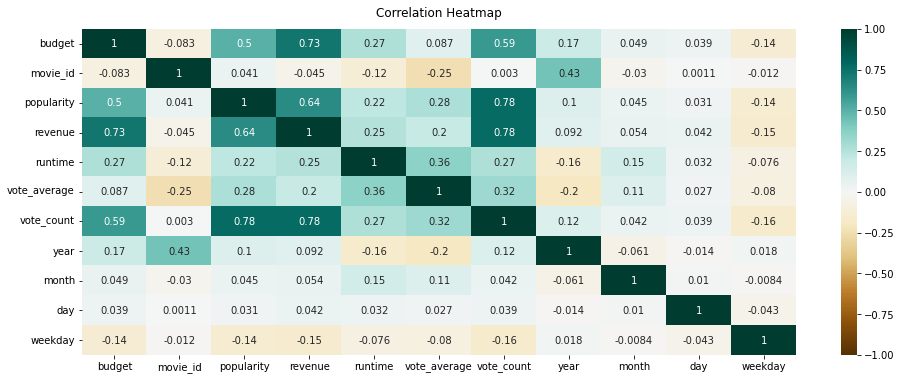

In [102]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
# heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

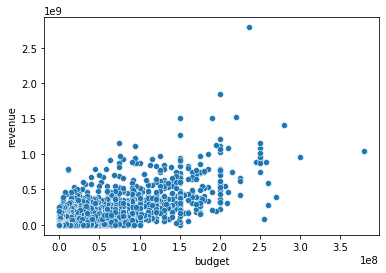

In [103]:
sns.scatterplot(x ='budget' , y = 'revenue', data = df)

# Model 1: Movie Recommender System

In [104]:
def remove_white_spaces(x):
    l= []
    for i in x:
        l.append(i.replace(" ",""))
    return l

In [105]:
df['cast'] = df['cast'].apply(remove_white_spaces)
df['director'] = df['director'].str.split(',').apply(remove_white_spaces)
df['genres'] = df['genres'].apply(remove_white_spaces)
df['keywords'] = df['keywords'].apply(remove_white_spaces)

In [106]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [107]:
df['info'] = df['overview'] + df['keywords'] + df['genres'] + df['cast'] + df['director']

In [108]:
df['info'] = df['info'].apply(lambda x: " ".join(x))

In [109]:
df['info'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d Action Adventure Fantasy ScienceFiction SamWorthington ZoeSaldana SigourneyWeaver StephenLang JamesCameron'

In [110]:
df['info'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: info, dtype: object

In [111]:
movie_recommend_df = df[['movie_id' , 'title_x' , 'info']]
movie_recommend_df.head()

,movie_id,title_x,info
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [113]:
vector = cv.fit_transform(movie_recommend_df['info']).toarray()

In [114]:
vector.shape

(4770, 5000)

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [116]:
def recommend(movie):
    index = movie_recommend_df[movie_recommend_df['title_x'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(movie_recommend_df.iloc[i[0]].title_x)

In [117]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Begins
Batman Returns
Batman
Batman Forever


In [118]:
recommend('Spider-Man 3')

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Arachnophobia


In [119]:
recommend("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: On Stranger Tides
Pirates of the Caribbean: The Curse of the Black Pearl
20,000 Leagues Under the Sea
Life of Pi


In [120]:
#import pickle

In [121]:
#pickle.dump(movie_recommend_df,open('movie_list.pkl','wb'))
#pickle.dump(similarity,open('similarity.pkl','wb'))

# Model 2: Movie Revenue Prediction Model

In [122]:
new_df = pd.concat([df, genre_dummies],axis=1, sort=False) #merging two data frame
new_df.head(5)

,budget,genres,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,[Walt Disney Pictures],[United States of America],...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [123]:
new_df.columns

Index(['budget', 'genres', 'movie_id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title_x', 'vote_average', 'vote_count',
       'title_y', 'cast', 'crew', 'director', 'year', 'month', 'day',
       'weekday', 'decade', 'info', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [124]:
cols_drop = ['genres', 'movie_id', 'keywords', 'original_language','original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title_x', 'title_y', 'cast', 'crew', 'director', 'day', 'decade', 'info']

In [125]:
revenue_df = new_df.drop(cols_drop , axis =1 )
revenue_df.sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,weekday,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1768,0,5.737161,0,106.0,6.8,79,2007,11,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2894,0,1.906807,0,140.0,6.5,28,2005,2,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1446,32000000,43.862456,54674226,139.0,6.5,987,2011,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3166,9000000,3.951041,34573780,120.0,6.8,38,1999,10,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,50000000,83.295796,222809600,106.0,6.8,2268,2014,1,6,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [126]:
revenue_df.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'year', 'month', 'weekday', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [127]:
revenue_df.dropna(inplace=True)

In [128]:
revenue_df.isna().sum()

budget             0
popularity         0
revenue            0
runtime            0
vote_average       0
vote_count         0
year               0
month              0
weekday            0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [129]:
X = revenue_df.drop(['revenue'] , 1)
y = revenue_df['revenue']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [130]:
X.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'year',
       'month', 'weekday', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [131]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state=0)

In [132]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3804, 28), (952, 28), (3804,), (952,))

In [133]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [134]:
RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=0)

In [135]:
def model_feature(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:{}'.format(round(r2_score(y_test , y_pred) , 2)))
    print('MAE',round(mean_absolute_error(y_test , y_pred) , 2))
    # print('MAPE' , round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    print('MSE' , round(mean_squared_error(y_test , y_pred) , 2))

In [136]:
from xgboost import XGBRegressor
import lightgbm as lgb

In [137]:
model_list = [LinearRegression(), lgb.LGBMRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), AdaBoostRegressor(), XGBRegressor() , Ridge() , Lasso() , KNeighborsRegressor(), DecisionTreeRegressor()]
model_list1 = []
R2_score = []
mae = []
score = []
mse = []
    
for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

[06:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.23232e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [138]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df

,Model,R2_score,MAE,MSE
1,LGBMRegressor,0.82,36044258.72,5.388885e+15
2,RandomForestRegressor,0.79,38657369.65,6.205079e+15
3,GradientBoostingRegressor,0.78,39984592.50,6.516751e+15
4,ExtraTreesRegressor,0.78,39527095.07,6.562538e+15
6,XGBRegressor,0.77,40357785.37,6.623381e+15
0,LinearRegression,0.73,48269972.84,7.852929e+15
7,Ridge,0.73,48254815.33,7.852432e+15
8,Lasso,0.73,48269969.82,7.852929e+15
9,KNeighborsRegressor,0.64,50245167.16,1.064564e+16
10,DecisionTreeRegressor,0.56,54883832.24,1.296381e+16
